# Flight delays- Data Exploration and Analysis with Pandas

Problem: The dataset contains data from the Bureau of the United States of transportation about the arrival, delay, and cancellation of domestic flights from July 2019 to July 2022. We will investigate and highlight which airlines and airports have the most delay and cancellation over time. We will also analyse the causes of the delays and cancellation. At last, we will see whether COVID-19 pandemic had an impact on the overwall flight cancellations.


## 1. Data Exploration:




In [1]:
#mounting drive
from google.colab import drive
drive.mount('/content/drive')

#importing panadas
import pandas as pd

#importing data files
df1=pd.read_csv("/content/drive/MyDrive/wk10_pandas_learner/Resources/Flight Delays/Flights_Delay_Cause_2019-2020.csv")
df2=pd.read_csv("/content/drive/MyDrive/wk10_pandas_learner/Resources/Flight Delays/Flights_Delay_Cause_2020-2021.csv")
df3=pd.read_csv("/content/drive/MyDrive/wk10_pandas_learner/Resources/Flight Delays/Flights_Delay_Cause_2021-2022.csv")

Mounted at /content/drive


The first step of any data analysis is to explore the data with key Pandas commands:

The dataset contains data from US domestic flights from July 2019 to July 2022, and consists of the following fields:

- year: the year of the flight
- month: the month of the flight
- carrier: the 2 letters abbreviation for the airline
- carrier_name: the complete name of the airline
- airport: the 3 letters Airport code
- airport_name: the airport full name
- arr_flights: number of arrived flights ontime
- arr_del15: number of delayed flights (flights are considered delayed after 15 minutes of the arrival time)
- arr_cancelled: number of cancelled flights
- arr_diverted: number of diverted flights
- arr_delay: number of delayed flights
- carrier_delay: number of flights delayed caused by the carrier
- weather_delay: number of flights delayed caused by the weather
- nas_delay: number of flighst delayed caused by the National Aviation System
- security_delay: number of flights delayed due to security issues


Let's explore the 5 first rows of the dataframe named df1:


In [2]:
df1.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN


Similarly, explore the 5 last rows of df1:

In [3]:
df1.tail()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
1675,2022,7,YX,Republic Airline,STL,"St. Louis, MO: St Louis Lambert International",131.0,26.0,6.0,0.0,2054.0,501.0,361.0,298.0,0.0,NaN
1676,2022,7,YX,Republic Airline,SYR,"Syracuse, NY: Syracuse Hancock International",149.0,35.0,2.0,0.0,2198.0,679.0,139.0,425.0,0.0,NaN
1677,2022,7,YX,Republic Airline,TUL,"Tulsa, OK: Tulsa International",10.0,2.0,0.0,0.0,135.0,8.0,0.0,11.0,0.0,NaN
1678,2022,7,YX,Republic Airline,TVC,"Traverse City, MI: Cherry Capital",98.0,13.0,1.0,0.0,950.0,162.0,0.0,291.0,0.0,NaN
1679,2022,7,YX,Republic Airline,XNA,"Fayetteville, AR: Northwest Arkansas Regional",56.0,13.0,3.0,0.0,1180.0,120.0,0.0,318.0,0.0,NaN


Since the dataset has 3 CSV files, for convenience let's combine all files in one document
with the `.concat()` method:

In [4]:
#use function .concat()
df= pd.concat([df1, df2, df3], ignore_index=True)
#setting the parametern ignore_index=True will reasign new indexes to the whole dataset, the intial indexes of each document will be ignored

Let's explore the first few rows of the whole dataset with the combined tables:

In [5]:
df.head(10)

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN
5,2022,7,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",114.0,16.0,5.0,0.0,1145.0,131.0,207.0,64.0,0.0,NaN
6,2022,7,9E,NaN,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2219.0,470.0,8.0,10.0,41843.0,18321.0,1554.0,7029.0,0.0,NaN
7,2022,7,9E,NaN,ATW,"Appleton, WI: Appleton International",17.0,3.0,0.0,0.0,73.0,43.0,0.0,30.0,0.0,NaN
8,2022,7,9E,Endeavor Air Inc.,AUS,"Austin, TX: Austin - Bergstrom International",37.0,4.0,3.0,0.0,301.0,279.0,22.0,0.0,0.0,NaN
9,2022,7,9E,Endeavor Air Inc.,AVL,"Asheville, NC: Asheville Regional",59.0,13.0,7.0,0.0,630.0,195.0,20.0,321.0,0.0,NaN


We can get some information about our dataset using a few functions

*   get the key information about the dataset using `.info()`
*   get the number of rows and columns using `.shape`
*   get the attribute data types of each column using `.dtypes`
*   summary of statistics with the `.describe()`



In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            42461 non-null  int64  
 1   month           42461 non-null  int64  
 2   carrier         42461 non-null  object 
 3   carrier_name    42445 non-null  object 
 4   airport         42461 non-null  object 
 5   airport_name    42461 non-null  object 
 6   arr_flights     42354 non-null  float64
 7   arr_del15       42183 non-null  float64
 8   arr_cancelled   42354 non-null  float64
 9   arr_diverted    42354 non-null  float64
 10  arr_delay       42354 non-null  float64
 11  carrier_delay   42354 non-null  float64
 12  weather_delay   42354 non-null  float64
 13  nas_delay       42354 non-null  float64
 14  security_delay  42354 non-null  float64
 15  delays          0 non-null      float64
dtypes: float64(10), int64(2), object(4)
memory usage: 5.2+ MB


In [7]:
df.shape

(42461, 16)

In [8]:
df.dtypes

year                int64
month               int64
carrier            object
carrier_name       object
airport            object
airport_name       object
arr_flights       float64
arr_del15         float64
arr_cancelled     float64
arr_diverted      float64
arr_delay         float64
carrier_delay     float64
weather_delay     float64
nas_delay         float64
security_delay    float64
delays            float64
dtype: object

In [9]:
df.describe()

,year,month,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays
count,42461.000000,42461.000000,42354.000000,42183.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,42354.000000,0.0
mean,2020.096324,6.529521,290.053950,41.470095,9.251641,0.624357,2757.859210,1007.217996,177.938495,587.135383,6.496647,NaN
std,0.815651,3.341909,836.485771,130.737062,70.613366,3.069780,9664.845862,3405.101443,742.131883,2784.605383,45.371314,NaN
min,2019.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2020.000000,4.000000,33.000000,3.000000,0.000000,0.000000,158.000000,49.000000,0.000000,9.000000,0.000000,NaN
50%,2020.000000,7.000000,81.000000,10.000000,0.000000,0.000000,566.000000,211.000000,0.000000,80.000000,0.000000,NaN
75%,2021.000000,9.000000,194.000000,28.000000,3.000000,0.000000,1737.000000,705.000000,99.000000,282.000000,0.000000,NaN
max,2022.000000,12.000000,21873.000000,3506.000000,4951.000000,154.000000,305694.000000,119425.000000,26428.000000,200000.000000,3760.000000,NaN


## 2. Data tranformation:

Before doing any modications to our dataframe, we will create a copy to not modify the original dataset in case we insert an error and cannot remove it. If you make an error in the original dataset without creating a copy you will need to restart the Python intrepreter to clear data in memory and re-run the script from the start.

In [10]:
df_copy = df.copy(deep=True)

After exploring the dataset variables, some data transformation might be needed.\
From the previous method used `.info()` we could see that the year and month are both float data types. To work efficiently with dates in Pandas, they need to be converted into a date datatype. This is done by using the `.todatetime()` method.\
We can create a new column named "date" to store the date which will have the "month" and "year" from our dataset. We can concatenate our 2 columns month and year using the "+" sign.\
Change the month and year datatypes to a string.
The `.astype()` method is used to cast pandas datatype to others.\
Then use `.todatetime()` to transform the date into a datetime datatype

In [11]:
df_copy=df_copy.astype({"month": str, "year":str})

df_copy['date']= df_copy['year']+"-"+df_copy['month']

df_copy['date']= pd.to_datetime(df_copy['date'], format='mixed')

The column 'data' that we could assign datatime as datatype to the 'date' column, but doing this we also introduced by default a day number, here '01'. To overcome this we would need to use an additonal function to get only the month and the year with a correct date format.

In [12]:
df_copy['date']= pd.to_datetime(df_copy['date']).dt.to_period('M')

In [13]:
df_copy.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,2022,7,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,2022,7,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,2022,7,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,2022,7,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,2022,7,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07


In [14]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42461 entries, 0 to 42460
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype    
---  ------          --------------  -----    
 0   year            42461 non-null  object   
 1   month           42461 non-null  object   
 2   carrier         42461 non-null  object   
 3   carrier_name    42445 non-null  object   
 4   airport         42461 non-null  object   
 5   airport_name    42461 non-null  object   
 6   arr_flights     42354 non-null  float64  
 7   arr_del15       42183 non-null  float64  
 8   arr_cancelled   42354 non-null  float64  
 9   arr_diverted    42354 non-null  float64  
 10  arr_delay       42354 non-null  float64  
 11  carrier_delay   42354 non-null  float64  
 12  weather_delay   42354 non-null  float64  
 13  nas_delay       42354 non-null  float64  
 14  security_delay  42354 non-null  float64  
 15  delays          0 non-null      float64  
 16  date            42461 non-null  period[M

Save the dataframe in the folder

In [15]:
df_copy.to_csv('/flights_dataset.csv')

Let's removed unwanted columns, the month and year columns, using the medthod .drop():

In [16]:
df_copy=df_copy.drop(['month', 'year'], axis=1)
df_copy.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",33.0,2.0,0.0,0.0,129.0,98.0,23.0,8.0,0.0,NaN,2022-07
1,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",78.0,25.0,0.0,0.0,1664.0,887.0,52.0,224.0,0.0,NaN,2022-07
2,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",124.0,19.0,5.0,4.0,1523.0,388.0,35.0,511.0,0.0,NaN,2022-07
3,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",67.0,10.0,0.0,1.0,657.0,103.0,82.0,93.0,25.0,NaN,2022-07
4,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",174.0,30.0,1.0,0.0,2462.0,1686.0,310.0,139.0,0.0,NaN,2022-07


## 3 Data Cleaning:


The next step after exploring our dataset and correct some of the datatypes we did would be to clean the dataset\
Let's check how many missing values our dataset has using the `isnull()` function:

In [17]:
df_copy.isnull().sum()

carrier               0
carrier_name         16
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42461
date                  0
dtype: int64

We can see see that missing values are presents in columns associated with numerical values and also in the carrier name. Missing data from the columns that contain important information on the name of the carrier or arilaine names that we are not able to identify can cause issues in our downstream analysis. We will me removed those for now since we cannot identify them. Replacing missing values should always be case specific.\
Remove missing values from the carrier name:

In [18]:
df_copy= df_copy.dropna(subset=['carrier_name'])

Verify the dataframe don't have any missing values left:

In [19]:
df_copy.isnull().sum()

carrier               0
carrier_name          0
airport               0
airport_name          0
arr_flights         107
arr_del15           278
arr_cancelled       107
arr_diverted        107
arr_delay           107
carrier_delay       107
weather_delay       107
nas_delay           107
security_delay      107
delays            42445
date                  0
dtype: int64

Let's check the distribution of the data:\
First, recall the names of the columns

In [20]:
df_copy.columns

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

We can check the data distribution to see if we get outliers in columns with numerical values using the built-in box_plot function in Pandas:

<Axes: >

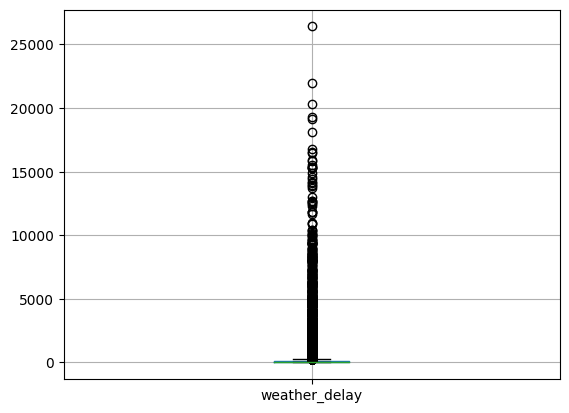

In [21]:
df_copy.boxplot('weather_delay')

Let's reuse the boxplot using a function:

In [22]:
def box_plot(flights):
    return df_copy.boxplot(flights)

<Axes: >

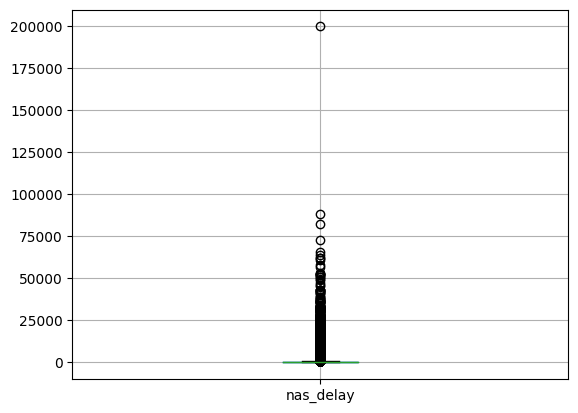

In [23]:
box_plot('nas_delay')

Call the function again to check other variables.

In [24]:
# Identify and remove the row with the outlier
outlier_index= df_copy[df_copy['nas_delay']>175000].index
df_cleaned= df_copy.drop(outlier_index)

In [25]:
outlier_index # we used the .index attribute to get the row number of our outlier

Index([363], dtype='int64')

<Axes: >

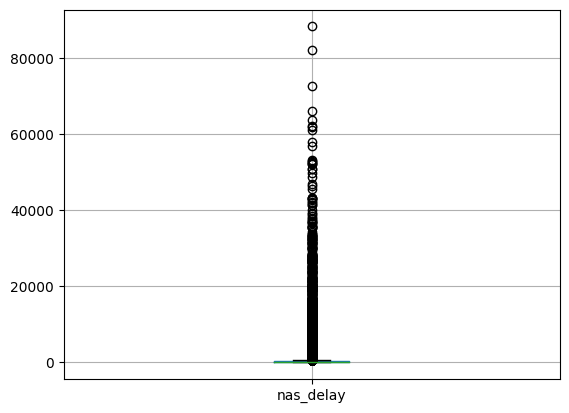

In [26]:
df_cleaned.boxplot('nas_delay')

We can see from the above boxplot that the outlier has been removed.

### Python Visualisations using matplotlib

Using the Python Matplotlib visualisation library, we can plot several plots at once using the subplots() function:\
Let's import the Matplotlib library to use it

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

<Axes: >

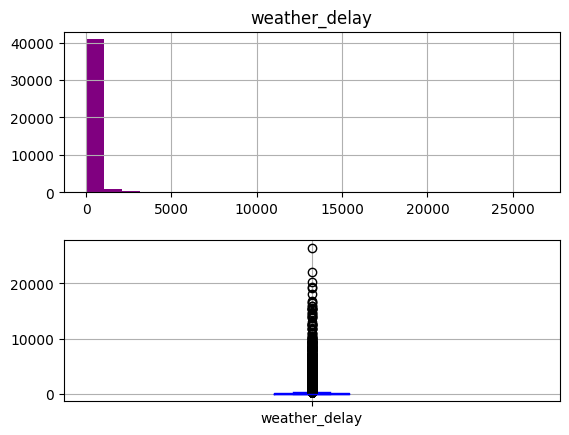

In [28]:
figure, ax = plt.subplots(nrows=2, ncols=1) # subplot layer has 2 rows an 1 column which means 2 figures
df_cleaned.hist('weather_delay',ax=ax[0], bins=25, color="purple")
df_cleaned.boxplot("weather_delay",ax=ax[1], color="blue")

Same as before, but create a function to create multiple plots:\
Creates a figure with two subplots:\
Histogram for data1 with min, max, mean and median values, and a legend\
Boxplot for data2, both with axis labels.

In [29]:
def subplot_function(data1, data2):  # I added one parameter per plot
    figure, ax = plt.subplots(nrows=2, ncols=1)  # Create a figure with 2 rows and 1 column of subplots

    # Get statistics for data1 to add reference lines
    min_val = df_cleaned[data1].min()
    max_val = df_cleaned[data1].max()
    mean_val = df_cleaned[data1].mean()
    med_val = df_cleaned[data1].median()

    # Add vertical reference lines for min, mean, median, and max in the first subplot
    ax[0].axvline(x=min_val, color='gray', linestyle='dashed', linewidth=2, label='Min')
    ax[0].axvline(x=mean_val, color='cyan', linestyle='dashed', linewidth=2, label='Mean')
    ax[0].axvline(x=med_val, color='red', linestyle='dashed', linewidth=2, label='Median')
    ax[0].axvline(x=max_val, color='blue', linestyle='dashed', linewidth=2, label='Max')
    ax[0].legend()  # Add a legend to explain the reference lines

    # Create histogram for data1 in the first subplot
    ax[0].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.hist(data1, ax=ax[0], bins=10, color="purple")

    # Create boxplot for data2 in the second subplot
    ax[1].set_xlabel('')  # Remove x-axis label for cleaner presentation
    ax[1].set_ylabel('Frequency')  # Set y-axis label
    df_cleaned.boxplot(data2, ax=ax[1], color="blue")
    df_cleaned.boxplot(data2,ax=ax[1], color="blue")

Using the defined function we can pass in the arguments for the two plots

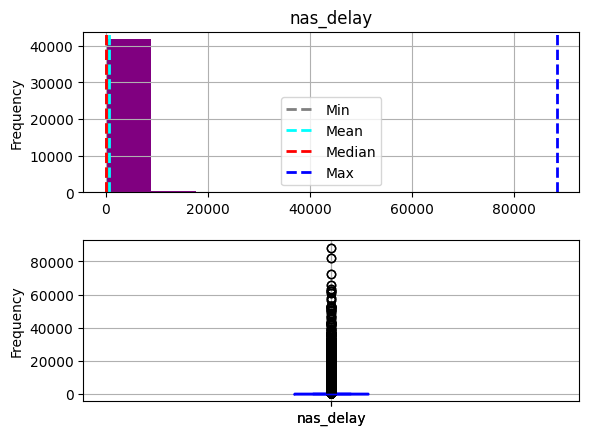

In [30]:
subplot_function('nas_delay',"nas_delay")

## 4. Data Analysis:

### Q1) Which Airlines have the most delayed flights?

We can group the airline data and calculate the average of delayed flights per airline

In [31]:
df_delays=df_cleaned.groupby(by="carrier_name", as_index=False)
#using the argument as_index=False in the groupby function will allow us to return a pandas dataframe, otherwise a pandas series will be returned.

We can see how many airlines has been grouped with the function .size():

In [32]:
df_delays.size()

,carrier_name,size
0,Alaska Airlines Inc.,1851
1,Allegiant Air,3158
2,American Airlines Inc.,2574
3,Delta Air Lines Inc.,3212
4,Endeavor Air Inc.,2720
5,Envoy Air,3655
6,ExpressJet Airlines LLC,1161
7,Frontier Airlines Inc.,2499
8,Hawaiian Airlines Inc.,435
9,Horizon Air,383


Next we calculate the mean of the delayed flights per airline:

In [33]:
df_delays=df_delays["arr_del15"].mean()

#here we get the top 5 of airlines with the most delays
df_delays

,carrier_name,arr_del15
0,Alaska Airlines Inc.,31.467820
1,Allegiant Air,15.350775
2,American Airlines Inc.,90.818217
3,Delta Air Lines Inc.,56.543136
4,Endeavor Air Inc.,19.188427
5,Envoy Air,23.282030
6,ExpressJet Airlines LLC,18.713537
7,Frontier Airlines Inc.,18.742065
8,Hawaiian Airlines Inc.,26.290323
9,Horizon Air,22.976501


Let's plot the data using the Matplotlib and Seaborn visualisation libraries:

In [34]:
#import matplotlib.pyplot as plt #*already imported*
import seaborn as sns

Prior to plotting, let's sort the data:\
Rearrange the rows in df_delays so that the rows with the largest values in the "arr_del15" column appear first.

Also create a new DataFrame `df4` that is a **sorted version** of `df_cleaned` with the rows arranged in **descending order** based on the values in the "arr_del15" column.

In [35]:
df_delays=df_delays.sort_values(by=["arr_del15"], ascending=False)

df4=df_cleaned.sort_values(by=["arr_del15"], ascending=False)

Create a bar chart for the data

<ipython-input-36-6415fc02a6f1>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df4, x="arr_del15", y="carrier_name", color="mediumpurple", ci=None)


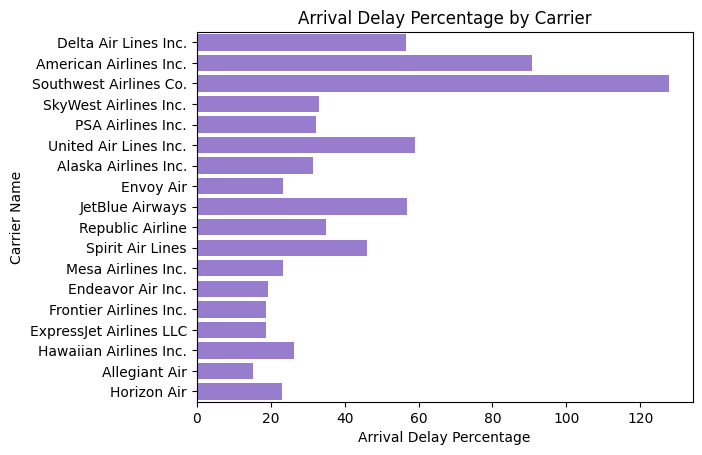

In [36]:
# Create a bar plot
sns.barplot(data=df4, x="arr_del15", y="carrier_name", color="mediumpurple", ci=None)

# Customize the plot (optional)
plt.title("Arrival Delay Percentage by Carrier")
plt.xlabel("Arrival Delay Percentage")
plt.ylabel("Carrier Name")

# Show the plot
plt.show()

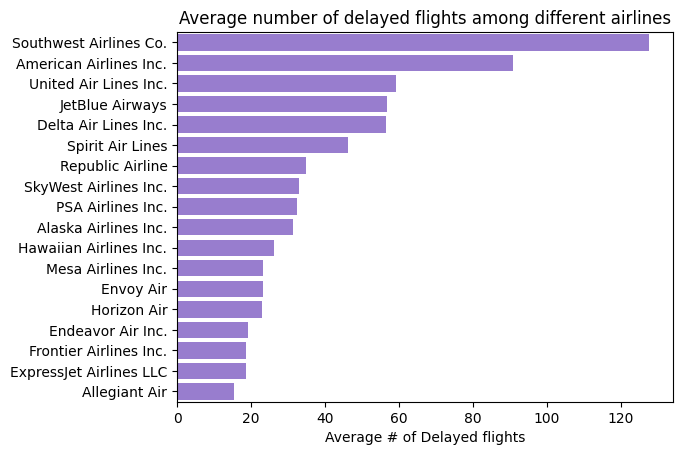

In [37]:
sns.barplot(data=df_delays, x="arr_del15", y="carrier_name", color="mediumpurple",errorbar=None) # different parameters are added to the varplot function (color, graph orientation)
plt.title("Average number of delayed flights among different airlines")  # We are putting a title to the graph
plt.ylabel("") # We are changing the y axis label
plt.xlabel("Average # of Delayed flights") # We are changing the x axis label
plt.show() # We need to call the figure to display it with the show() function

We can see from the above plot that Southwest Airlines Co. has the most delayed flights compared to the other airlines.

### Q2) Which Airline is the most affected by both delayed and cancelled flights?

Let's use a similar approach as the previous analysis with the groupby() method:

In [38]:
# Group the DataFrame by carrier name, keeping carrier name as a column
df_delays_carrier = df_cleaned.groupby(by="carrier_name", as_index=False)

# Calculate mean values for 'arr_del15' and 'arr_cancelled' columns for each carrier
df_delays_carrier = df_delays_carrier[["arr_del15", "arr_cancelled"]].mean()

# Set the 'carrier_name' column as the index of the DataFrame
df_delays_carrier = df_delays_carrier.set_index("carrier_name")

# Display the resulting DataFrame
print(df_delays_carrier)

                          arr_del15  arr_cancelled
carrier_name                                      
Alaska Airlines Inc.      31.467820       4.393514
Allegiant Air             15.350775       5.340089
American Airlines Inc.    90.818217      19.720171
Delta Air Lines Inc.      56.543136      10.099874
Endeavor Air Inc.         19.188427       3.935543
Envoy Air                 23.282030       5.369732
ExpressJet Airlines LLC   18.713537       5.384014
Frontier Airlines Inc.    18.742065       2.908764
Hawaiian Airlines Inc.    26.290323       5.204598
Horizon Air               22.976501       3.775457
JetBlue Airways           56.828776       7.290720
Mesa Airlines Inc.        23.320392       5.483177
PSA Airlines Inc.         32.399742       8.195708
Republic Airline          34.889739       8.319120
SkyWest Airlines Inc.     33.051461       6.289242
Southwest Airlines Co.   127.741895      41.722776
Spirit Air Lines          46.170713       4.875583
United Air Lines Inc.     59.11

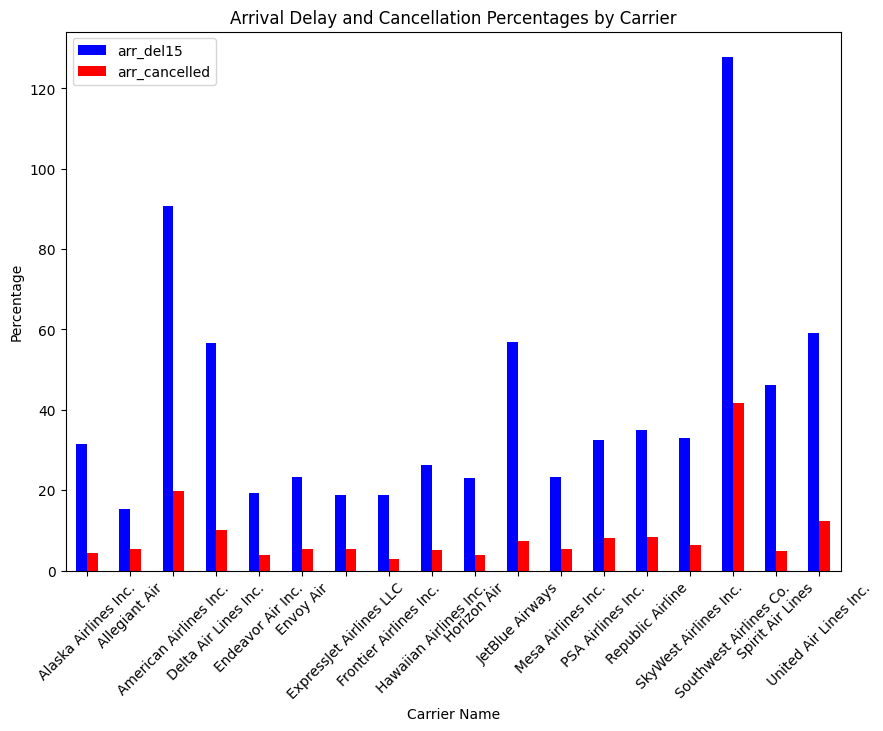

In [39]:
# Create a bar plot showing arrival delay and cancellation percentages by carrier
colours= ['blue', 'red']
df_delays_carrier.plot(kind="bar", figsize=(10,7), color=colours)

# Customize the plot (optional)
plt.title("Arrival Delay and Cancellation Percentages by Carrier")
plt.xlabel("Carrier Name")
plt.ylabel("Percentage")
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Show the plot
plt.show()

Southwest Arilines Co. has also the most cancellation compared to the other carriers.

### Q3) What are the main cause of flights cancellations and delays for the company Southwest Airlines Co.?

Let's isolate data from the Southwest Airlines Co. to look at the causes. To do this we need to search for the company name in carrier_name column and isolate all columns related to that carrier.

In [40]:
df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")

# Filter rows where the "carrier_name" contains "Southwest Airlines Co."
df_SW_airline = df_cleaned[df_cleaned["carrier_name"].str.contains("Southwest Airlines Co.")]

# Display the first few rows of the filtered DataFrame
df_SW_airline.head()

,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,delays,date
1409,WN,Southwest Airlines Co.,ABQ,"Albuquerque, NM: Albuquerque International Sun...",687.0,226.0,6.0,1.0,12541.0,4255.0,66.0,720.0,60.0,NaN,2022-07
1410,WN,Southwest Airlines Co.,ALB,"Albany, NY: Albany International",293.0,80.0,6.0,0.0,5679.0,2147.0,126.0,116.0,19.0,NaN,2022-07
1411,WN,Southwest Airlines Co.,AMA,"Amarillo, TX: Rick Husband Amarillo International",200.0,48.0,4.0,0.0,2940.0,1033.0,35.0,128.0,0.0,NaN,2022-07
1412,WN,Southwest Airlines Co.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2718.0,875.0,25.0,8.0,51674.0,16615.0,1812.0,6030.0,52.0,NaN,2022-07
1413,WN,Southwest Airlines Co.,AUS,"Austin, TX: Austin - Bergstrom International",3046.0,874.0,23.0,4.0,47176.0,16714.0,1228.0,4232.0,234.0,NaN,2022-07


In [41]:
# To confirm we have isolated one carrier only:
df_SW_airline["carrier_name"].value_counts()

carrier_name
Southwest Airlines Co.    2406
Name: count, dtype: int64

In [42]:
df_SW_airline.keys() # same as the .columns attribute

# We are selecting only the columns related to causes of delay NAS (National Aviation System) Delay
df_SW_subset=df_SW_airline[["carrier_delay","weather_delay","nas_delay","security_delay"]]

In [43]:
#we are going to create new columns to get the sum of all delay causes
carrier_delay_tot=df_SW_subset["carrier_delay"].sum()
print(carrier_delay_tot)

weather_delay_tot=df_SW_subset["weather_delay"].sum()
print(weather_delay_tot)

nas_delay_tot=df_SW_subset["nas_delay"].sum()
print(nas_delay_tot)

security_delay_tot=df_SW_subset["security_delay"].sum()
print(security_delay_tot)

5518974.0
441728.0
2542425.0
48830.0


In [44]:
# We are creating a new dataframe containing only the sum of each delay causes
data=[carrier_delay_tot,weather_delay_tot,nas_delay_tot,security_delay_tot]

df_cause=pd.DataFrame(data,index=["carrier", "weather", "nas", "security"], columns=["causes"])
df_cause

,causes
carrier,5518974.0
weather,441728.0
nas,2542425.0
security,48830.0


Let's use an interactive visualisation library from Python named Plotly and Kleido which are part of dash:

In [45]:
#import the libraries to use it
!pip install dash --upgrade

import dash
import plotly.express as px

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 16.5 MB/s eta 0:00:00


In [46]:
#sort the data before plotting
sorted_df= df_cause.sort_values(by='causes',ascending=False)
sorted_df

,causes
carrier,5518974.0
nas,2542425.0
weather,441728.0
security,48830.0


In [47]:
figure= px.bar(sorted_df, title="Causes of flights cancellations and delays of the Southwest Airlines Co. from 2019-2022")

# Update the x-axis label
figure.update_xaxes(title='Casues')
# Update the y-axis label
figure.update_yaxes(title='No. of Cancellation and Delays (Millions)')

figure.show()

The main cause of delays for the compamy Southwest Airlines.Co is carrier related.

### Q4) What are the main cause of flights cancellation and delays among the different airlines?

In [48]:
#We can set the index to carrier name directly when passing the argument as_index=True
df_cause_airlines=df_cleaned.groupby(by="carrier_name", as_index=True)[["carrier_delay","weather_delay","nas_delay", "security_delay"]].mean()
df_cause_airlines.head()

,carrier_delay,weather_delay,nas_delay,security_delay
carrier_name,,,,
Alaska Airlines Inc.,489.294595,45.616757,470.972973,12.560541
Allegiant Air,387.435719,79.325522,188.015833,4.800507
American Airlines Inc.,2414.164011,346.050525,1215.510688,17.385931
Delta Air Lines Inc.,1622.915829,207.202261,887.169598,7.716709
Endeavor Air Inc.,500.519337,112.360958,329.980479,0.893554


In [49]:
figure2 = px.bar(df_cause_airlines, title="Causes of flights cancelation and delay")
figure2.update_layout(xaxis_title="Airlines", yaxis_title="", legend_title="causes")
figure2.show()

### Q5) Does COVID-19 pandemic have an effect on flight delays and cancelations?

In [50]:
df_cleaned.keys()

Index(['carrier', 'carrier_name', 'airport', 'airport_name', 'arr_flights',
       'arr_del15', 'arr_cancelled', 'arr_diverted', 'arr_delay',
       'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay',
       'delays', 'date'],
      dtype='object')

<Axes: title={'center': 'Number of canceled flights during 2019 to 2022'}, xlabel='date', ylabel='# of Cancelled flights'>

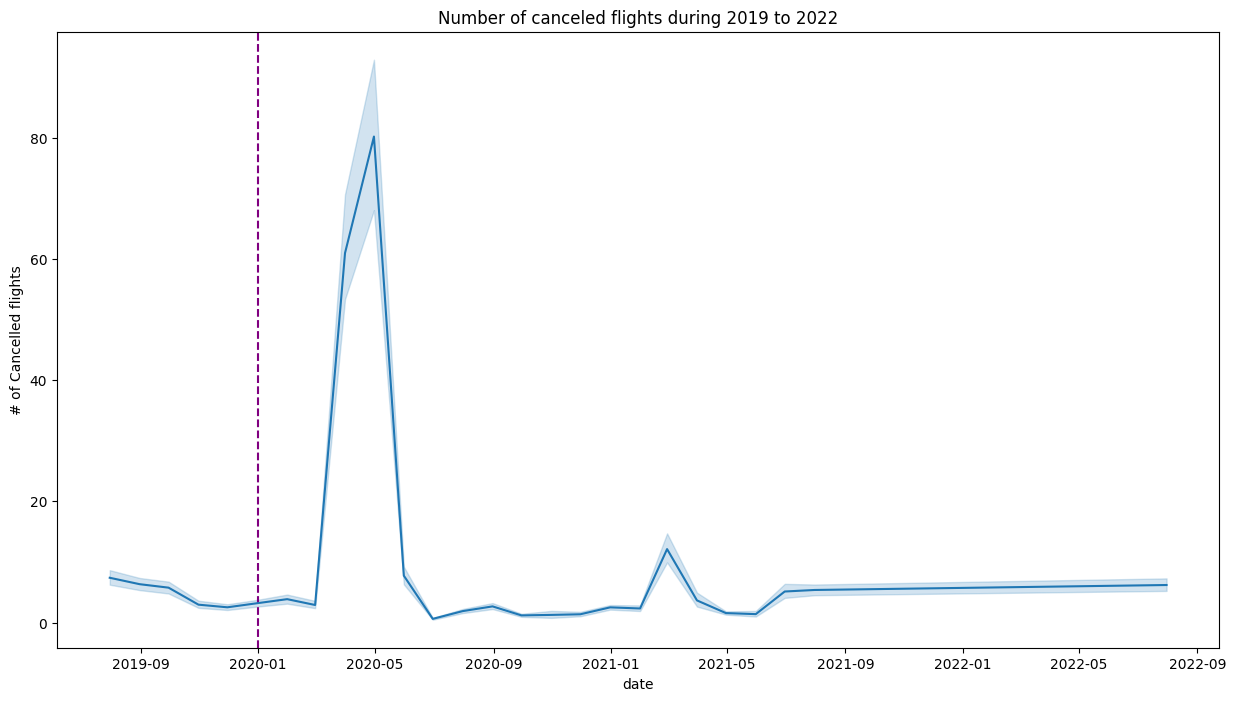

In [51]:
# Create a new matplotlib figure with a specified size
plt.figure(figsize=(15, 8))

# Add a vertical dashed line at the specific date '2020-01-01'
plt.axvline(pd.Timestamp('2020-01-01'), color='purple', linestyle='--')

# Set the title of the plot
plt.title("Number of canceled flights during 2019 to 2022")

# Set the label for the y-axis (vertical axis)
plt.ylabel("# of Cancelled flights")

# Create a line plot using Seaborn
sns.lineplot(data=df_cleaned, x="date", y="arr_cancelled")

We can see a sharp increase of flighs being canceled just after the appartion of the COVID-19 pandemic (purple dash line) and lockdowns that had followed and affected airline operations.